In [1]:
import librosa
import librosa.display
import numpy as np
import matplotlib.pyplot as plt

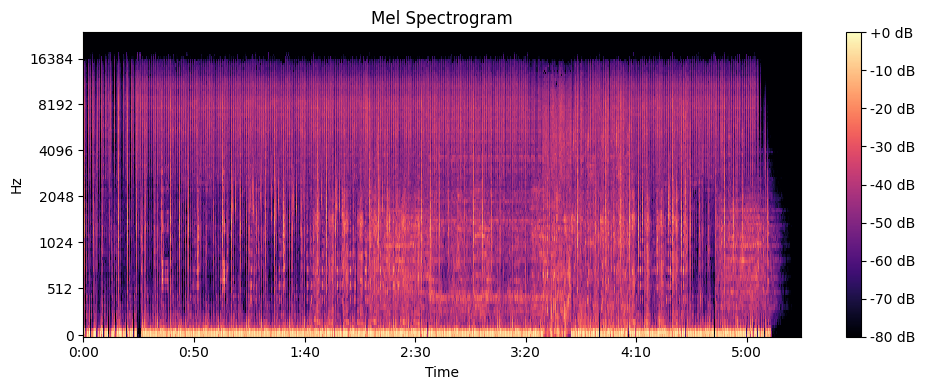

In [2]:
# Load audio file
audio_path = "audio/Dave N_A_ - H_E_A_T_4.mp3"  # Replace with your audio file
y, sr = librosa.load(audio_path, sr=None)  # Load with original sampling rate

# Generate a mel spectrogram
n_fft = 2048  # Size of FFT
hop_length = 512  # Step size
n_mels = 128  # Number of mel bands

spectrogram = librosa.feature.melspectrogram(y=y, sr=sr, n_fft=n_fft, hop_length=hop_length, n_mels=n_mels)
log_spectrogram = librosa.power_to_db(spectrogram, ref=np.max)

# Display spectrogram
plt.figure(figsize=(10, 4))
librosa.display.specshow(log_spectrogram, sr=sr, hop_length=hop_length, y_axis='mel', x_axis='time', cmap='magma')
plt.colorbar(format='%+2.0f dB')
plt.title('Mel Spectrogram')
plt.tight_layout()
plt.show()


In [3]:
from sklearn.decomposition import PCA

# Flatten spectrogram over time to create input for PCA
spectrogram_flat = log_spectrogram.T  # Shape (time, features)

# Apply PCA
latent_dim = 2  # Adjust based on your model
pca = PCA(n_components=latent_dim)
latent_points = pca.fit_transform(spectrogram_flat)

# Normalize the latent points
latent_points = (latent_points - latent_points.min(axis=0)) / (latent_points.max(axis=0) - latent_points.min(axis=0))


In [4]:
from scipy.interpolate import interp1d

# Create an interpolation function for each latent dimension
time_steps = np.linspace(0, 1, len(latent_points))
interpolated_steps = np.linspace(0, 1, 500)  # 500 frames for smooth animation

interpolated_points = np.array([
    interp1d(time_steps, latent_points[:, dim], kind='cubic')(interpolated_steps)
    for dim in range(latent_dim)
]).T


In [5]:
import torch
from torchvision.utils import save_image

# Example: Using a pretrained VAE
class DummyVAE:
    def decode(self, z):
        # Replace this with your generative model's decoding step
        return torch.randn((1, 3, 64, 64))  # Placeholder image

vae = DummyVAE()

# Generate and save visuals
output_dir = "output_images/"
for i, latent_point in enumerate(interpolated_points):
    z = torch.tensor(latent_point, dtype=torch.float32).unsqueeze(0)
    image = vae.decode(z)
    save_image(image, f"{output_dir}/frame_{i:04d}.png")


In [ ]:
# !ffmpeg -r 25 -i output_images/frame_%04d.png -i audio/Dave N_A_ - H_E_A_T_4.mp3 -c:v libx264 -crf 20 -preset fast -c:a aac -strict experimental -shortest output_video.mp4


/bin/bash: ffmpeg: command not found
